In [1]:
import matplotlib.pyplot as plt 
import mlflow
mlflow.set_tracking_uri("sqlite:///mlflow.db")
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
from utils import Load_Rumours_Dataset_filtering_since_first_post


### Summary - Experiments with tabular dataset - Charlie Hebdo


* Training data without time cut (70% of data). Testing data with time cut to understand performance on early detection
* Filtering post publication time  and reply time (minutes since firs post publication)
*  Ex: 50 minutes will pick tweets and interations 50 minutes after the first post (start of the event) for only test set
* Time cute range from 14 minutes to 3 days
* In the final time cut we will have 601 posts , 134 rumours
* In the first time cut we will have 5 posts , with 3 rumours

#### Xgboost - SMOTE oversampling 

* SMOTE to oversample the minory class

In [2]:
df = pd.read_csv("posts_by_time_cut.csv")

In [3]:
df_xgboost_smote= pd.read_csv("Xgboost SMOTE Filter Node on Test  2024-10-29 10 min-3days.csv")[['metrics.time_cut','metrics.test_recall',\
                  'metrics.test_precision']].dropna().sort_values(by='metrics.time_cut')
df_xgboost_smote['metrics.time_cut'] = df_xgboost_smote['metrics.time_cut'].astype('int')

In [4]:
df_xgboost_smote = df_xgboost_smote.merge(df,left_on='metrics.time_cut', right_on='time_cut')

In [5]:
df_xgboost_smote['metrics.test_recall'] = df_xgboost_smote['metrics.test_recall'].round(2)
df_xgboost_smote['metrics.test_precision'] = df_xgboost_smote['metrics.test_precision'].round(2)

In [6]:
df_xgboost_smote['time_cut_hours'] = round(df_xgboost_smote['time_cut']/60,2)

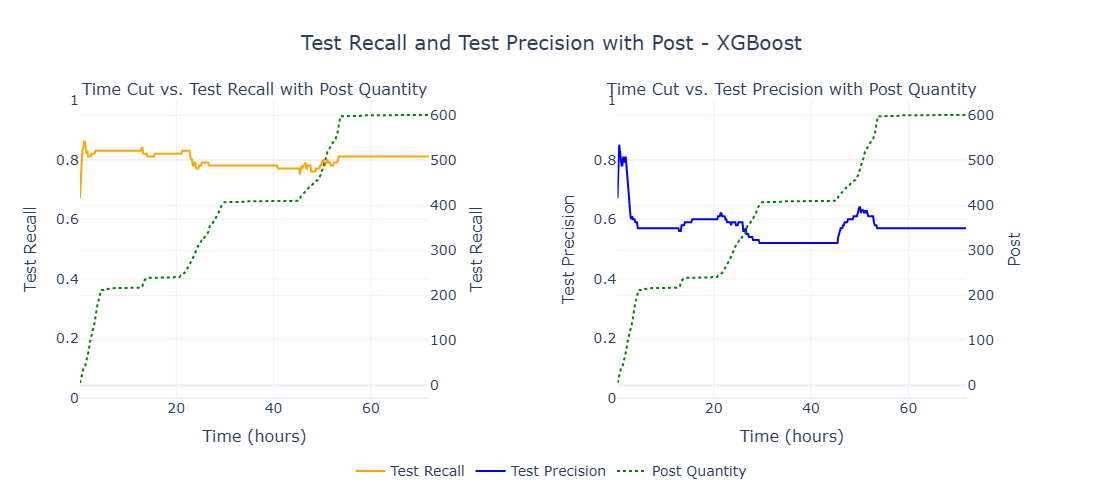

In [84]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_xgboost_smote['time_cut_hours'],
        y=df_xgboost_smote['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_xgboost_smote['time_cut_hours'],
        y=df_xgboost_smote['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_xgboost_smote['time_cut_hours'],
        y=df_xgboost_smote['post'],
        mode='lines',
        name='Post Quantity',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_xgboost_smote['time_cut_hours'],
        y=df_xgboost_smote['post'],
        mode='lines',
        name='Post Quantity',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True,
)

# Update layout with larger font sizes
fig.update_layout(
    title="Test Recall and Test Precision with Post - XGBoost",
    title_x=0.5,  # Center the main title
    template='plotly_white',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5,
        font=dict(size=14)  # Increase legend font size
    ),
    width=1100,  # Set the width
    height=500,  # Set the height
    font=dict(size=14),  # Increase global font size
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1, title_font=dict(size=16))
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2, title_font=dict(size=16))
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2, title_font=dict(size=16))

# Update X-axis labels and font sizes
fig.update_xaxes(title_text="Time (hours)", row=1, col=1, title_font=dict(size=16), tickfont=dict(size=14))
fig.update_xaxes(title_text="Time (hours)", row=1, col=2, title_font=dict(size=16), tickfont=dict(size=14))

# Update the left Y-axis range for both subplots
fig.update_yaxes(range=[0, 1], row=1, col=1, secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2, secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


In [8]:
df_xgboost_smote.drop(columns=['Unnamed: 0']).to_csv("df_xgboost_smote_experiment_data_cleaned.csv")

#### Random Forest - SMOTE oversampling 

* SMOTE to oversample the minory class

In [9]:
df_rf_smote = pd.read_csv("Random Forest SMOTE Filter Node on Test  2024-10-30 10 min-3days.csv")

In [10]:
df_rf_smote= df_rf_smote[['metrics.time_cut','metrics.test_recall',\
                  'metrics.test_precision']].dropna().sort_values(by='metrics.time_cut')
df_rf_smote['metrics.time_cut'] = df_rf_smote['metrics.time_cut'].astype('int')

df_rf_smote = df_rf_smote.merge(df,left_on='metrics.time_cut', right_on='time_cut')

df_rf_smote['metrics.test_recall'] = df_rf_smote['metrics.test_recall'].round(2)
df_rf_smote['metrics.test_precision'] = df_rf_smote['metrics.test_precision'].round(2)

df_rf_smote['time_cut_hours'] = round(df_rf_smote['time_cut']/60,2)

In [11]:
df_rf_smote['time_cut_hours'] = round(df_rf_smote['time_cut']/60,2)

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_rf_smote['time_cut_hours'],
        y=df_rf_smote['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_rf_smote['time_cut_hours'],
        y=df_rf_smote['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_rf_smote['time_cut_hours'],
        y=df_rf_smote['post'],
        mode='lines',
        name='Post Quantity',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_rf_smote['time_cut_hours'],
        y=df_rf_smote['post'],
        mode='lines',
        name='Post Quantity',
        line=dict(color='green', dash='dot'), showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title="Test Recall and Test Precision with Post - Random Forest",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


In [13]:
df_rf_smote.drop(columns=['Unnamed: 0']).to_csv("df_rf_smote_experiment_data_cleaned.csv")

#### LSTM - SMOTE oversampling 

* SMOTE to oversample the minory class

In [14]:
df_lstm_smote = pd.read_csv("LSTM 2024-11-18 SMOTE Filter Node on test time since first post.csv").dropna()

In [15]:
df_lstm_smote= df_lstm_smote[['metrics.time_cut','metrics.test_recall',\
                  'metrics.test_precision']].dropna().sort_values(by='metrics.time_cut')
df_lstm_smote['metrics.time_cut'] = df_lstm_smote['metrics.time_cut'].astype('int')

df_lstm_smote = df_lstm_smote.merge(df,left_on='metrics.time_cut', right_on='time_cut')

df_lstm_smote['metrics.test_recall'] = df_lstm_smote['metrics.test_recall'].round(2)
df_lstm_smote['metrics.test_precision'] = df_lstm_smote['metrics.test_precision'].round(2)

df_lstm_smote['time_cut_hours'] = round(df_lstm_smote['time_cut']/60,2)

df_lstm_smote['time_cut_hours'] = round(df_lstm_smote['time_cut']/60,2)

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_lstm_smote['time_cut_hours'],
        y=df_lstm_smote['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_lstm_smote['time_cut_hours'],
        y=df_lstm_smote['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_lstm_smote['time_cut_hours'],
        y=df_lstm_smote['post'],
        mode='lines',
        name='Post Quantity',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_lstm_smote['time_cut_hours'],
        y=df_lstm_smote['post'],
        mode='lines',
        name='Post Quantity',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title="Test Recall and Test Precision with Post - LSTM",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


In [17]:
df_lstm_smote.drop(columns=['Unnamed: 0']).to_csv("df_lstm_smote_experiment_data_cleaned.csv")

### Summary - Experiments with graph dataset


* Training data without time cut (70% of data). Testing data with time cut to understand performance on early detection
* Filtering post publication time  and reply time (minutes since firs post publication)
*  Ex: 50 minutes will pick tweets and interations 50 minutes after the first post (start of the event) for only test set
* Time cute range from 14 minutes to 3 days
* In the final time cut we will have 601 posts , 134 rumours
* In the first time cut we will have 5 posts , with 3 rumours

#### Graph Attention Network 2 layers

In [18]:
df_gat_2_layers = pd.read_csv(r"GAT Network 2024-10-30 2 layers Filter Node on test time since first post.csv")

In [19]:
df_gat_2_layers= df_gat_2_layers[['metrics.time_cut','metrics.test_recall',\
                  'metrics.test_precision']].dropna().sort_values(by='metrics.time_cut')
df_gat_2_layers['metrics.time_cut'] = df_gat_2_layers['metrics.time_cut'].astype('int')

df_gat_2_layers = df_gat_2_layers.merge(df,left_on='metrics.time_cut', right_on='time_cut')

df_gat_2_layers['metrics.test_recall'] = df_gat_2_layers['metrics.test_recall'].round(2)
df_gat_2_layers['metrics.test_precision'] = df_gat_2_layers['metrics.test_precision'].round(2)

df_gat_2_layers['time_cut_hours'] = round(df_gat_2_layers['time_cut']/60,2)

df_gat_2_layers['time_cut_hours'] = round(df_gat_2_layers['time_cut']/60,2)

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_gat_2_layers['time_cut_hours'],
        y=df_gat_2_layers['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_gat_2_layers['time_cut_hours'],
        y=df_gat_2_layers['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_gat_2_layers['time_cut_hours'],
        y=df_gat_2_layers['post'],
        mode='lines',
        name='Post Quantity',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_gat_2_layers['time_cut_hours'],
        y=df_gat_2_layers['post'],
        mode='lines',
        name='Post Quantity',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title="Test Recall and Test Precision with Post - Gat two layers",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


In [21]:
df_gat_2_layers.drop(columns=['Unnamed: 0']).to_csv("df_gat_2_layers_experiment_data_cleaned.csv")

#### Heterogeneous Graph Attention Network 2 layers

In [22]:
df_han_2_layers = pd.read_csv(r"HAN 2024-10-31 2 layers Filter Node on test time since first post.csv")

In [23]:
df_han_2_layers= df_han_2_layers[['metrics.time_cut','metrics.test_recall',\
                  'metrics.test_precision']].dropna().sort_values(by='metrics.time_cut')
df_han_2_layers['metrics.time_cut'] = df_han_2_layers['metrics.time_cut'].astype('int')

df_han_2_layers = df_han_2_layers.merge(df,left_on='metrics.time_cut', right_on='time_cut')

df_han_2_layers['metrics.test_recall'] = df_han_2_layers['metrics.test_recall'].round(2)
df_han_2_layers['metrics.test_precision'] = df_han_2_layers['metrics.test_precision'].round(2)

df_han_2_layers['time_cut_hours'] = round(df_han_2_layers['time_cut']/60,2)

df_han_2_layers['time_cut_hours'] = round(df_han_2_layers['time_cut']/60,2)

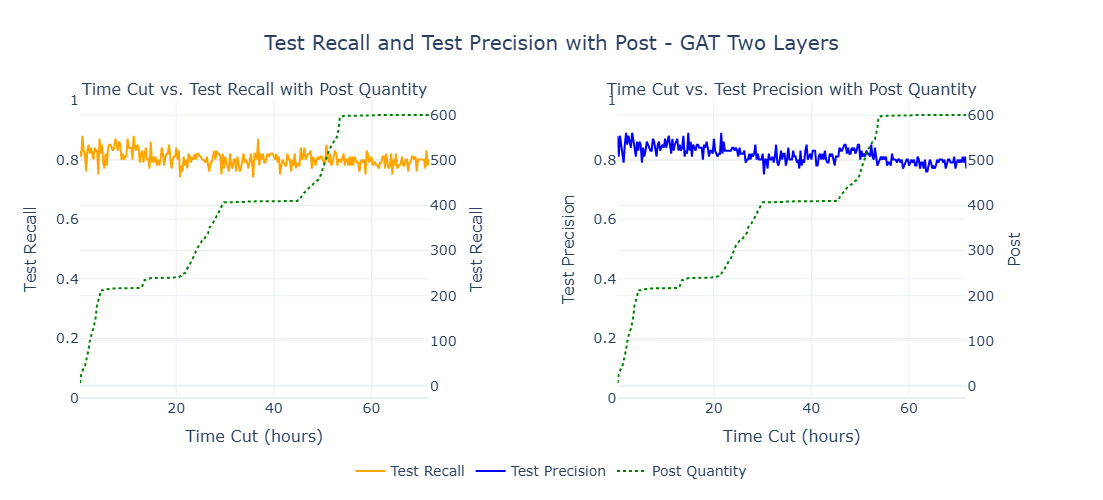

In [85]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_han_2_layers['time_cut_hours'],
        y=df_han_2_layers['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_han_2_layers['time_cut_hours'],
        y=df_han_2_layers['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_han_2_layers['time_cut_hours'],
        y=df_han_2_layers['post'],
        mode='lines',
        name='Post Quantity',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_han_2_layers['time_cut_hours'],
        y=df_gat_2_layers['post'],
        mode='lines',
        name='Post Quantity',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout with larger font sizes
fig.update_layout(
    title="Test Recall and Test Precision with Post - GAT Two Layers",
    title_x=0.5,  # Center the main title
    template='plotly_white',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5,
        font=dict(size=14)  # Increase legend font size
    ),
    width=1100,  # Set the width
    height=500,  # Set the height
    font=dict(size=14),  # Increase global font size
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1, title_font=dict(size=16))
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2, title_font=dict(size=16))
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2, title_font=dict(size=16))

# Update X-axis labels and font sizes
fig.update_xaxes(title_text="Time Cut (hours)", row=1, col=1, title_font=dict(size=16), tickfont=dict(size=14))
fig.update_xaxes(title_text="Time Cut (hours)", row=1, col=2, title_font=dict(size=16), tickfont=dict(size=14))

# Update the left Y-axis range for both subplots
fig.update_yaxes(range=[0, 1], row=1, col=1, secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2, secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


In [25]:
df_han_2_layers.drop(columns=['Unnamed: 0']).to_csv("df_han_2_layers_experiment_data_cleaned.csv")

#### Statistic metrics of experiments by model

In [26]:
df_xgboost_smote['model'] = 'xgboost'
df_rf_smote['model'] = 'random_forest'
df_lstm_smote['model'] = 'lstm'
df_gat_2_layers['model'] = 'gat_2_layers'
df_han_2_layers['model'] = 'han_2_layers'

In [27]:
df_all = pd.concat([df_xgboost_smote,df_rf_smote,df_lstm_smote,df_gat_2_layers,df_han_2_layers]).drop(columns=['Unnamed: 0'])

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create the subplot with 1 row and 1 column (one plot with two Y-axes)
fig = make_subplots(
    rows=1, cols=1,
    subplot_titles=["Test Recall and Post Quantity vs Time Cut Hours by Model"],
    specs=[[{"secondary_y": True}]]  # Enable secondary Y-axis
)

# Add the trace for Test Recall by model (left Y-axis)
models = df_all['model'].unique()  # Get unique models for grouping

for model in models:
    model_data = df_all[df_all['model'] == model]
    fig.add_trace(
        go.Scatter(
            x=model_data['time_cut_hours'],
            y=model_data['metrics.test_recall'],
            mode='lines',
            name=f'Test Recall ({model})',
            line=dict(dash='solid'),
        ),
        row=1, col=1
    )



# Update layout and axis titles
fig.update_layout(
    title="Test Recall and Post Quantity vs Time Cut Hours by Model",
    template='plotly_white',
    width=1100,  # Set the width
    height=500,  # Set the height
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5)
)

# Update Y-axes titles
fig.update_yaxes(title_text="Test Recall", row=1, col=1)
fig.update_yaxes(title_text="Post Quantity", secondary_y=True, row=1, col=1)

# Display the plot
fig.show()


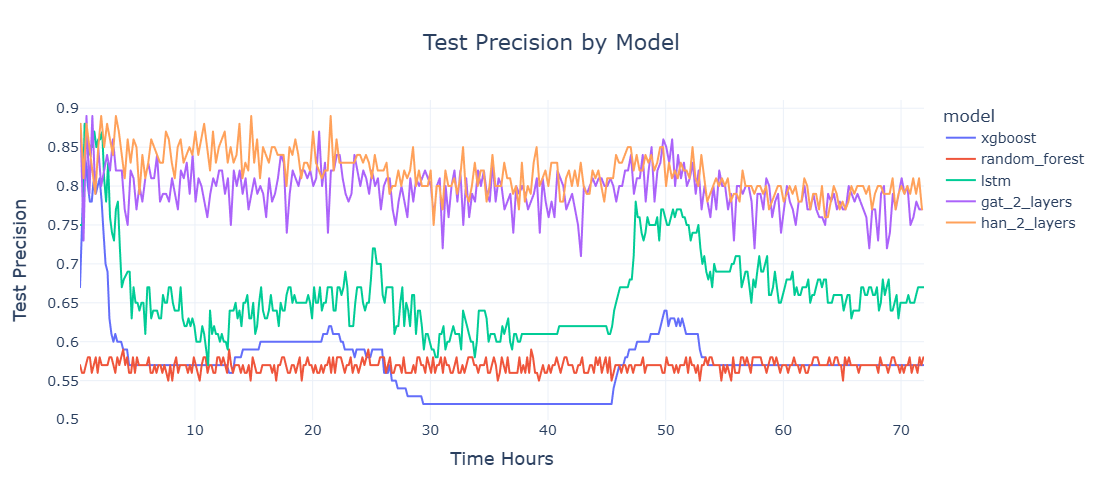

In [87]:
import plotly.express as px

# Create a line plot for 'metrics.test_precision' vs 'time_cut_hours' by 'model'
fig = px.line(
    df_all, 
    x='time_cut_hours', 
    y='metrics.test_precision', 
    color='model', 
    title="Test Precision vs Time Cut Hours by Model", 
    labels={
        "metrics.test_precision": "Test Precision", 
        "time_cut_hours": "Time Cut Hours"
    }
)

# Update layout for better readability
fig.update_layout(
    title="Test Precision by Model",  # Corrected title
    title_x=0.5,  # Center the main title
    template='plotly_white',
    width=1100,  # Set the width
    height=500,  # Set the height
    font=dict(size=16),  # Increase global font size
    xaxis=dict(title="Time Hours", title_font=dict(size=18), tickfont=dict(size=14)),
    yaxis=dict(title="Test Precision", title_font=dict(size=18), tickfont=dict(size=14)),
    legend=dict(font=dict(size=14))  # Increase legend font size
)

# Show the plot
fig.show()


In [30]:
df_all.groupby('model')[['metrics.test_recall', 'metrics.test_precision']].agg(['mean', 'std', 'min', 'max']).round(2)

metrics.test_recall                   metrics.test_precision  \
                             mean   std   min   max                   mean   
model                                                                        
gat_2_layers                 0.78  0.03  0.70  0.89                   0.79   
han_2_layers                 0.80  0.03  0.74  0.88                   0.82   
lstm                         0.76  0.03  0.67  1.00                   0.66   
random_forest                0.81  0.01  0.78  0.85                   0.57   
xgboost                      0.80  0.02  0.67  0.86                   0.57   

                                 
                std   min   max  
model                            
gat_2_layers   0.03  0.71  0.89  
han_2_layers   0.03  0.75  0.89  
lstm           0.05  0.57  0.88  
random_forest  0.01  0.55  0.59  
xgboost        0.05  0.52  0.85

### Transfer Learning - GAT Network

#### Germanwings Crash

In [31]:
df_posts_by_time_cut = pd.read_csv('germanwings_crash_posts_by_time_cut.csv')

In [32]:
df_germanwings_crash = pd.read_csv("GAT Network 2024-12-21 2 layers germanwings crash.csv")

In [33]:
df_germanwings_crash['metrics.time_cut'] = df_germanwings_crash['metrics.time_cut'].astype('int')
df_germanwings_crash = df_germanwings_crash.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_germanwings_crash['metrics.test_recall'] = df_germanwings_crash['metrics.test_recall'].round(2)
df_germanwings_crash['metrics.test_precision'] = df_germanwings_crash['metrics.test_precision'].round(2)
df_germanwings_crash['time_cut_hours'] = round(df_germanwings_crash['time_cut']/60,2)

In [34]:
print("Hour start test: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].min()/60,2))

print("Hour end test: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].max()/60,2))



print("Rumours Train: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']<=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['rumours'].max(),2))

print("No Rumours Train: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['no_rumours'].max(),2))

Hour start test:  1.08
Hour end test:  44.08
Rumours Train:  73
No Rumours Train:  172


In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot'),
         showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['no_rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title="Test Recall and Test Precision with Post - Germanwings Crash",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1,secondary_y=False)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


In [36]:
df_germanwings_crash[['metrics.time_cut','post','rumours','no_rumours','perc_dataset','metrics.test_precision','metrics.test_recall','time_cut_hours']]\
.sort_values(by='metrics.time_cut',ascending=True).head(20)

,metrics.time_cut,post,rumours,no_rumours,perc_dataset,metrics.test_precision,metrics.test_recall,time_cut_hours
176,5,6,6,0,0.01,0.50,0.30,0.08
175,20,50,44,6,0.12,0.64,0.68,0.33
174,35,81,65,16,0.20,0.60,0.64,0.58
173,50,114,73,41,0.28,0.59,0.63,0.83
172,65,159,85,74,0.40,0.58,0.61,1.08
171,80,191,89,102,0.48,0.64,0.68,1.33
170,95,207,93,114,0.51,0.62,0.65,1.58
169,110,215,94,121,0.53,0.66,0.70,1.83
168,125,226,101,125,0.56,0.63,0.66,2.08
167,140,246,107,139,0.61,0.67,0.71,2.33


#### Sydneysiege

In [37]:
df_posts_by_time_cut = pd.read_csv('sydneysiege_posts_by_time_cut.csv')

In [38]:
df_sydney_siege = pd.read_csv("GAT Network 2024-12-21 2 layers sydneysiege.csv")

In [39]:
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')

In [40]:
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege = df_sydney_siege.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_sydney_siege['metrics.test_recall'] = df_sydney_siege['metrics.test_recall'].round(2)
df_sydney_siege['metrics.test_precision'] = df_sydney_siege['metrics.test_precision'].round(2)
df_sydney_siege['time_cut_hours'] = round(df_sydney_siege['time_cut']/60,2)

In [41]:
print("Hour start test: ",round(df_sydney_siege[df_sydney_siege['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].min()/60,2))

print("Hour end test: ",round(df_sydney_siege[df_sydney_siege['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].max()/60,2))


print("Rumours Train: ",round(df_sydney_siege[df_sydney_siege['perc_dataset']<=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['rumours'].max(),2))

print("No Rumours Train: ",round(df_sydney_siege[df_sydney_siege['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['no_rumours'].max(),2))

Hour start test:  3.58
Hour end test:  16.83
Rumours Train:  206
No Rumours Train:  660


In [42]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['no_rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title="Test Recall and Test Precision with Post - Sydneysiege",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1,secondary_y=False)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


In [43]:

df_sydney_siege[['metrics.time_cut','post','rumours','no_rumours','perc_dataset','metrics.test_precision','metrics.test_recall','time_cut_hours']]\
.sort_values(by='metrics.time_cut',ascending=True).head(20)

,metrics.time_cut,post,rumours,no_rumours,perc_dataset,metrics.test_precision,metrics.test_recall,time_cut_hours
67,5,1,0,1,0.00,1.00,1.00,0.08
66,20,14,12,2,0.01,0.93,0.83,0.33
65,35,38,35,3,0.03,0.76,0.75,0.58
64,50,57,49,8,0.05,0.82,0.78,0.83
63,65,92,73,19,0.08,0.74,0.72,1.08
62,80,115,90,25,0.10,0.70,0.65,1.33
61,95,148,114,34,0.13,0.67,0.65,1.58
60,110,176,129,47,0.15,0.77,0.74,1.83
59,125,198,141,57,0.17,0.78,0.76,2.08
58,140,230,155,75,0.20,0.79,0.79,2.33


#### Ferguson

In [44]:
df_posts_by_time_cut = pd.read_csv('ferguson_posts_by_time_cut.csv')

In [45]:
df_ferguson = pd.read_csv("GAT Network 2024-12-21 2 layers ferguson.csv")

In [46]:
df_ferguson['metrics.time_cut'] = df_ferguson['metrics.time_cut'].astype('int')
df_ferguson = df_ferguson.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ferguson['metrics.test_recall'] = df_ferguson['metrics.test_recall'].round(2)
df_ferguson['metrics.test_precision'] = df_ferguson['metrics.test_precision'].round(2)
df_ferguson['time_cut_hours'] = round(df_ferguson['time_cut']/60,2)

In [47]:
print("Hour start test: ",round(df_ferguson[df_ferguson['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].min()/60,2))

print("Hour end test: ",round(df_ferguson[df_ferguson['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].max()/60,2))


print("Rumours Train: ",round(df_ferguson[df_ferguson['perc_dataset']<=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['rumours'].max(),2))

print("No Rumours Train: ",round(df_ferguson[df_ferguson['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['no_rumours'].max(),2))

Hour start test:  81.0
Hour end test:  143.0
Rumours Train:  25
No Rumours Train:  719


In [48]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['no_rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title="Test Recall and Test Precision with Post - Ferguson",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


#### Ottawa Shooting

In [49]:
df_posts_by_time_cut = pd.read_csv('ottawa_shooting_posts_by_time_cut.csv')

In [50]:
df_ottawa_shooting = pd.read_csv("GAT Network 2024-12-21 2 layers ottawashooting.csv")

In [51]:
df_ottawa_shooting['metrics.time_cut'] = df_ottawa_shooting['metrics.time_cut'].astype('int')
df_ottawa_shooting = df_ottawa_shooting.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ottawa_shooting['metrics.test_recall'] = df_ottawa_shooting['metrics.test_recall'].round(2)
df_ottawa_shooting['metrics.test_precision'] = df_ottawa_shooting['metrics.test_precision'].round(2)
df_ottawa_shooting['time_cut_hours'] = round(df_ottawa_shooting['time_cut']/60,2)

In [52]:
print("Hour start test: ",round(df_ottawa_shooting[df_ottawa_shooting['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].min()/60,2))

print("Hour end test: ",round(df_ottawa_shooting[df_ottawa_shooting['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].max()/60,2))


print("Rumours Train: ",round(df_ottawa_shooting[df_ottawa_shooting['perc_dataset']<=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['rumours'].max(),2))

print("No Rumours Train: ",round(df_ottawa_shooting[df_ottawa_shooting['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['no_rumours'].max(),2))

Hour start test:  1.83
Hour end test:  9.83
Rumours Train:  127
No Rumours Train:  398


In [53]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot'),
         showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot'),
         showlegend=False
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot'),
    
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
        title="Test Recall and Test Precision with Post - Ottawa Shooting",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
#fig.update_yaxes(title_text="Test Recall", row=1, col=1)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Test Recall", secondary_y=False, row=1, col=1)
fig.update_yaxes(title_text="Posts", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


In [54]:

df_ottawa_shooting[['metrics.time_cut','post','rumours','no_rumours','perc_dataset','metrics.test_precision','metrics.test_recall','time_cut_hours']]\
.sort_values(by='metrics.time_cut',ascending=True).head(20)

,metrics.time_cut,post,rumours,no_rumours,perc_dataset,metrics.test_precision,metrics.test_recall,time_cut_hours
39,5,8,4,4,0.01,0.80,0.80,0.08
38,20,38,27,11,0.04,0.81,0.83,0.33
37,35,67,42,25,0.08,0.78,0.78,0.58
36,50,96,58,38,0.11,0.75,0.75,0.83
35,65,145,86,59,0.17,0.81,0.80,1.08
34,80,172,102,70,0.20,0.80,0.79,1.33
33,95,218,127,91,0.25,0.80,0.80,1.58
32,110,276,164,112,0.32,0.77,0.75,1.83
31,125,319,184,135,0.37,0.82,0.81,2.08
30,140,362,201,161,0.42,0.77,0.73,2.33


In [55]:
df_germanwings_crash['model']='gat'
df_germanwings_crash['dataset']='germanwings_crash'
df_sydney_siege['model']='gat'
df_sydney_siege['dataset']='sydney_siege'
df_ferguson['model']='gat'
df_ferguson['dataset']='ferguson'
df_ottawa_shooting['model']='gat'
df_ottawa_shooting['dataset']='ottawa_shooting'
df_all_tl=  pd.concat([df_germanwings_crash,df_sydney_siege,df_ferguson,df_ottawa_shooting])

### Transfer Learning - HAN Network

#### Germanwings Crash

In [56]:
df_posts_by_time_cut = pd.read_csv('germanwings_crash_posts_by_time_cut.csv')
df_germanwings_crash = pd.read_csv("HAN_Network_2024_12_29_2_layers_germanwings_crash.csv")
df_germanwings_crash['metrics.time_cut'] = df_germanwings_crash['metrics.time_cut'].astype('int')
df_germanwings_crash = df_germanwings_crash.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_germanwings_crash['metrics.test_recall'] = df_germanwings_crash['metrics.test_recall'].round(2)
df_germanwings_crash['metrics.test_precision'] = df_germanwings_crash['metrics.test_precision'].round(2)
df_germanwings_crash['time_cut_hours'] = round(df_germanwings_crash['time_cut']/60,2)
print("Hour start test: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].min()/60,2))

print("Hour end test: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].max()/60,2))



print("Rumours Train: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']<=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['rumours'].max(),2))

print("No Rumours Train: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['no_rumours'].max(),2))

Hour start test:  0.92
Hour end test:  71.92
Rumours Train:  70
No Rumours Train:  201


In [57]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['no_rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title="Test Recall and Test Precision with Post - Germanwings Crash",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1,secondary_y=False)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


#### Sydneysiege

In [58]:
df_posts_by_time_cut = pd.read_csv('sydneysiege_posts_by_time_cut.csv')
df_sydney_siege = pd.read_csv("HAN_Network_2024_12_29_2_layers_sydneysiege.csv")
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege = df_sydney_siege.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_sydney_siege['metrics.test_recall'] = df_sydney_siege['metrics.test_recall'].round(2)
df_sydney_siege['metrics.test_precision'] = df_sydney_siege['metrics.test_precision'].round(2)
df_sydney_siege['time_cut_hours'] = round(df_sydney_siege['time_cut']/60,2)
print("Hour start test: ",round(df_sydney_siege[df_sydney_siege['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].min()/60,2))

print("Hour end test: ",round(df_sydney_siege[df_sydney_siege['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].max()/60,2))


print("Rumours Train: ",round(df_sydney_siege[df_sydney_siege['perc_dataset']<=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['rumours'].max(),2))

print("No Rumours Train: ",round(df_sydney_siege[df_sydney_siege['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['no_rumours'].max(),2))

Hour start test:  3.67
Hour end test:  16.92
Rumours Train:  209
No Rumours Train:  671


In [59]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title="Test Recall and Test Precision with Post - Sydney Siege",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1,secondary_y=False)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


#### Ottawa Shooting

In [60]:
# Get the experiment ID or name
experiment_name = "HAN Network 2024-12-30 2 layers ottawashootingh"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_ottawa_shooting = mlflow.search_runs(experiment_ids=[experiment_id]).dropna()
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")
    
df_posts_by_time_cut = pd.read_csv('ottawa_shooting_posts_by_time_cut.csv')

df_ottawa_shooting['metrics.time_cut'] = df_ottawa_shooting['metrics.time_cut'].astype('int')
df_ottawa_shooting = df_ottawa_shooting.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ottawa_shooting['metrics.test_recall'] = df_ottawa_shooting['metrics.test_recall'].round(2)
df_ottawa_shooting['metrics.test_precision'] = df_ottawa_shooting['metrics.test_precision'].round(2)
df_ottawa_shooting['time_cut_hours'] = round(df_ottawa_shooting['time_cut']/60,2)

print("Hour start test: ",round(df_ottawa_shooting[df_ottawa_shooting['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].min()/60,2))

print("Hour end test: ",round(df_ottawa_shooting[df_ottawa_shooting['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].max()/60,2))


print("Rumours Train: ",round(df_ottawa_shooting[df_ottawa_shooting['perc_dataset']<=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['rumours'].max(),2))

print("No Rumours Train: ",round(df_ottawa_shooting[df_ottawa_shooting['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['no_rumours'].max(),2))

Hour start test:  1.92
Hour end test:  9.92
Rumours Train:  133
No Rumours Train:  400


In [61]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
        title="Test Recall and Test Precision with Post - Ottawa Shooting",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
#fig.update_yaxes(title_text="Test Recall", row=1, col=1)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Test Recall", secondary_y=False, row=1, col=1)
fig.update_yaxes(title_text="Posts", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


#### Ferguson

In [62]:
df_posts_by_time_cut

,Unnamed: 0,time_cut,rumours,post,previous_post,new_posts,no_rumours,perc_dataset
0,0,5,4,8,0.0,0.0,4,0.01
1,1,6,9,13,8.0,5.0,4,0.02
2,2,7,9,13,13.0,0.0,4,0.02
3,3,8,10,14,13.0,1.0,4,0.02
4,4,9,12,16,14.0,2.0,4,0.02
...,...,...,...,...,...,...,...,...
589,589,594,456,856,855.0,1.0,400,1.00
590,590,595,456,856,856.0,0.0,400,1.00
591,591,596,456,856,856.0,0.0,400,1.00
592,592,597,456,856,856.0,0.0,400,1.00


In [63]:
df_posts_by_time_cut = pd.read_csv('ferguson_posts_by_time_cut.csv')

# Get the experiment ID or name
experiment_name = "HAN Network 2024-12-30 2 layers ferguson"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_ferguson = mlflow.search_runs(experiment_ids=[experiment_id]).dropna(subset='end_time')
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")

In [64]:

df_ferguson['metrics.time_cut'] = df_ferguson['metrics.time_cut'].astype('int')
df_ferguson = df_ferguson.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ferguson['metrics.test_recall'] = df_ferguson['metrics.test_recall'].round(2)
df_ferguson['metrics.test_precision'] = df_ferguson['metrics.test_precision'].round(2)
df_ferguson['time_cut_hours'] = round(df_ferguson['time_cut']/60,2)
print("Hour start test: ",round(df_ferguson[df_ferguson['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].min()/60,2))

print("Hour end test: ",round(df_ferguson[df_ferguson['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].max()/60,2))


print("Rumours Train: ",round(df_ferguson[df_ferguson['perc_dataset']<=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['rumours'].max(),2))

print("No Rumours Train: ",round(df_ferguson[df_ferguson['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['no_rumours'].max(),2))

Hour start test:  81.0
Hour end test:  143.0
Rumours Train:  25
No Rumours Train:  719


In [65]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)


# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot'),
          showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title="Test Recall and Test Precision with Post - Ferguson",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


In [66]:
df_germanwings_crash['model']='han'
df_germanwings_crash['dataset']='germanwings_crash'
df_sydney_siege['model']='han'
df_sydney_siege['dataset']='sydney_siege'
df_ferguson['model']='han'
df_ferguson['dataset']='ferguson'
df_ottawa_shooting['model']='han'
df_ottawa_shooting['dataset']='ottawa_shooting'
df_all_tl=  pd.concat([df_all_tl,df_germanwings_crash,df_sydney_siege,df_ferguson,df_ottawa_shooting])

#### ML Models

#### Ottawa Shooting

In [67]:
import pandas as pd
df_posts_by_time_cut = pd.read_csv('ottawa_shooting_posts_by_time_cut.csv')

In [68]:
df_ottawa_shooting = pd.read_csv("Xgboost SMOTE Filter Node 2024-12-27 Transfer Learning ottawashooting.csv")
df_ottawa_shooting['metrics.time_cut'] = df_ottawa_shooting['metrics.time_cut'].astype('int')
df_ottawa_shooting = df_ottawa_shooting.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ottawa_shooting['metrics.test_recall'] = df_ottawa_shooting['metrics.test_recall'].round(2)
df_ottawa_shooting['metrics.test_precision'] = df_ottawa_shooting['metrics.test_precision'].round(2)
df_ottawa_shooting['time_cut_hours'] = round(df_ottawa_shooting['time_cut']/60,2)

print("Hour start test: ",round(df_ottawa_shooting[df_ottawa_shooting['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].min()/60,2))

print("Hour end test: ",round(df_ottawa_shooting[df_ottawa_shooting['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].max()/60,2))


print("Rumours Train: ",round(df_ottawa_shooting[df_ottawa_shooting['perc_dataset']<=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['rumours'].max(),2))

print("No Rumours Train: ",round(df_ottawa_shooting[df_ottawa_shooting['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['no_rumours'].max(),2))

Hour start test:  1.92
Hour end test:  9.92
Rumours Train:  133
No Rumours Train:  400


In [69]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot'),
          showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ottawa_shooting['time_cut_hours'],
        y=df_ottawa_shooting['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
        title="Test Recall and Test Precision with Post - Ottawa Shooting",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
#fig.update_yaxes(title_text="Test Recall", row=1, col=1)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Test Recall", secondary_y=False, row=1, col=1)
fig.update_yaxes(title_text="Posts", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


#### Germanwings Crash

In [70]:
# Get the experiment ID or name
experiment_name = "Xgboost SMOTE Filter Node 2024-12-28 Transfer Learning germanwings_crash"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_germanwings_crash = mlflow.search_runs(experiment_ids=[experiment_id])
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")


In [71]:
df_posts_by_time_cut = pd.read_csv('germanwings_crash_posts_by_time_cut.csv')
df_germanwings_crash['metrics.time_cut'] = df_germanwings_crash['metrics.time_cut'].astype('int')
df_germanwings_crash = df_germanwings_crash.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_germanwings_crash['metrics.test_recall'] = df_germanwings_crash['metrics.test_recall'].round(2)
df_germanwings_crash['metrics.test_precision'] = df_germanwings_crash['metrics.test_precision'].round(2)
df_germanwings_crash['time_cut_hours'] = round(df_germanwings_crash['time_cut']/60,2)
print("Hour start test: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].min()/60,2))

print("Hour end test: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].max()/60,2))



print("Rumours Train: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']<=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['rumours'].max(),2))

print("No Rumours Train: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['no_rumours'].max(),2))

Hour start test:  0.92
Hour end test:  71.92
Rumours Train:  70
No Rumours Train:  201


In [72]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot'),
          showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title="Test Recall and Test Precision with Post - Germanwings Crash",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1,secondary_y=False)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


#### Sydneysiege

In [73]:
df_posts_by_time_cut = pd.read_csv('sydneysiege_posts_by_time_cut.csv')
df_sydney_siege = pd.read_csv("Xgboost SMOTE Filter Node 2024-12-27 Transfer Learning sydneysiege.csv")
df_sydney_siege['metrics.time_cut'] = df_sydney_siege['metrics.time_cut'].astype('int')
df_sydney_siege = df_sydney_siege.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_sydney_siege['metrics.test_recall'] = df_sydney_siege['metrics.test_recall'].round(2)
df_sydney_siege['metrics.test_precision'] = df_sydney_siege['metrics.test_precision'].round(2)
df_sydney_siege['time_cut_hours'] = round(df_sydney_siege['time_cut']/60,2)
print("Hour start test: ",round(df_sydney_siege[df_sydney_siege['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].min()/60,2))

print("Hour end test: ",round(df_sydney_siege[df_sydney_siege['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].max()/60,2))


print("Rumours Train: ",round(df_sydney_siege[df_sydney_siege['perc_dataset']<=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['rumours'].max(),2))

print("No Rumours Train: ",round(df_sydney_siege[df_sydney_siege['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['no_rumours'].max(),2))

Hour start test:  3.67
Hour end test:  16.92
Rumours Train:  209
No Rumours Train:  671


In [74]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot'),
         showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_sydney_siege['time_cut_hours'],
        y=df_sydney_siege['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title="Test Recall and Test Precision with Post -Sydneysiege",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1,secondary_y=False)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


#### Ferguson

In [75]:
# Get the experiment ID or name
experiment_name = "Xgboost SMOTE Filter Node 2024-12-28 Transfer Learning ferguson"  # Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_ferguson = mlflow.search_runs(experiment_ids=[experiment_id]).drop_duplicates()
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")

df_posts_by_time_cut = pd.read_csv('ferguson_posts_by_time_cut.csv')
df_ferguson['metrics.time_cut'] = df_ferguson['metrics.time_cut'].astype('int')
df_ferguson = df_ferguson.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_ferguson['metrics.test_recall'] = df_ferguson['metrics.test_recall'].round(2)
df_ferguson['metrics.test_precision'] = df_ferguson['metrics.test_precision'].round(2)
df_ferguson['time_cut_hours'] = round(df_ferguson['time_cut']/60,2)
print("Hour start test: ",round(df_ferguson[df_ferguson['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].min()/60,2))

print("Hour end test: ",round(df_ferguson[df_ferguson['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].max()/60,2))


print("Rumours Train: ",round(df_ferguson[df_ferguson['perc_dataset']<=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['rumours'].max(),2))

print("No Rumours Train: ",round(df_ferguson[df_ferguson['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['no_rumours'].max(),2))

Hour start test:  81.0
Hour end test:  143.0
Rumours Train:  25
No Rumours Train:  719


In [76]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)


# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot'),
          showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_ferguson['time_cut_hours'],
        y=df_ferguson['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title="Test Recall and Test Precision with Post - Ferguson",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


#### Random forest

#### Germanwings Crash

In [77]:

# Get the experiment ID or name
experiment_name = "Random Forest SMOTE Filter Node 2024-12-29 Transfer Learning Germanwings Crash"
# Replace with your experiment name
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment is not None:
    experiment_id = experiment.experiment_id

    # Retrieve all runs in the experiment as a DataFrame
    df_germanwings_crash = mlflow.search_runs(experiment_ids=[experiment_id]).dropna(subset='end_time')
    
    # Show the DataFrame
    #print(df)
else:
    print(f"Experiment '{experiment_name}' not found.")

In [78]:
df_posts_by_time_cut = pd.read_csv('germanwings_crash_posts_by_time_cut.csv')
df_germanwings_crash['metrics.time_cut'] = df_germanwings_crash['metrics.time_cut'].astype('int')
df_germanwings_crash = df_germanwings_crash.merge(df_posts_by_time_cut,left_on='metrics.time_cut', right_on='time_cut')
df_germanwings_crash['metrics.test_recall'] = df_germanwings_crash['metrics.test_recall'].round(2)
df_germanwings_crash['metrics.test_precision'] = df_germanwings_crash['metrics.test_precision'].round(2)
df_germanwings_crash['time_cut_hours'] = round(df_germanwings_crash['time_cut']/60,2)
print("Hour start test: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].min()/60,2))

print("Hour end test: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['metrics.time_cut'].max()/60,2))



print("Rumours Train: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']<=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['rumours'].max(),2))

print("No Rumours Train: ",round(df_germanwings_crash[df_germanwings_crash['perc_dataset']>=0.29].sort_values(\
      by='metrics.time_cut',ascending=True)['no_rumours'].max(),2))

Hour start test:  0.92
Hour end test:  71.92
Rumours Train:  70
No Rumours Train:  201


In [79]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Time Cut vs. Test Recall with Post Quantity", "Time Cut vs. Test Precision with Post Quantity"],
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# First chart: Time Cut vs Test Recall
fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['metrics.test_recall'],
        mode='lines',
        name='Test Recall',
        line=dict(color='Orange')
    ),
    row=1, col=1
)

# Second chart: Time Cut vs Test Precision with Post
fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['metrics.test_precision'],
        mode='lines',
        name='Test Precision',
        line=dict(color='blue')
    ),
    row=1, col=2, secondary_y=False
)

# Adding Post Quantity to both subplots
fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='red', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['no_rumours'],
        mode='lines',
        name='No Rumours',
        line=dict(color='green', dash='dot')
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=df_germanwings_crash['time_cut_hours'],
        y=df_germanwings_crash['no_rumours'],
        mode='lines',
        name='Rumours',
        line=dict(color='green', dash='dot'),
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title="Test Recall and Test Precision with Post - Germanwings Crash",
    title_x=0.5,  # Center the main title,
    template='plotly_white',
    legend=dict(orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    width=1100,  # Set the width
    height=500,  # Set the height
)

# Update Y-axis titles for both subplots
fig.update_yaxes(title_text="Test Recall", row=1, col=1,secondary_y=False)
fig.update_yaxes(title_text="Test Precision", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Post", secondary_y=True, row=1, col=2)

# Update the left Y-axis range for both subplots (if needed)
fig.update_yaxes(range=[0, 1], row=1, col=1,secondary_y=False)  # Adjust range for the left Y-axis of the first chart
fig.update_yaxes(range=[0, 1], row=1, col=2,secondary_y=False)  # Adjust range for the left Y-axis of the second chart

# Display the plot
fig.show()


#### Sydneysiege

In [80]:
df_germanwings_crash['model']='xgboost'
df_germanwings_crash['dataset']='germanwings_crash'
df_sydney_siege['model']='xgboost'
df_sydney_siege['dataset']='sydney_siege'
df_ferguson['model']='xgboost'
df_ferguson['dataset']='ferguson'
df_ottawa_shooting['model']='xgboost'
df_ottawa_shooting['dataset']='ottawa_shooting'
df_all_tl=  pd.concat([df_all_tl,df_germanwings_crash,df_sydney_siege,df_ferguson,df_ottawa_shooting])

In [81]:
df_all_tl.groupby(['dataset','model'])[['metrics.test_recall', 'metrics.test_precision']].agg(['mean', 'std', 'min', 'max', 'median'])

metrics.test_recall                               \
                                         mean       std   min   max median   
dataset           model                                                      
ferguson          gat                0.548240  0.043925  0.46  0.83  0.550   
                  han                0.549272  0.041367  0.46  0.83  0.550   
                  xgboost            0.298101  0.091209  0.21  1.00  0.325   
germanwings_crash gat                0.671412  0.039482  0.30  0.75  0.670   
                  han                0.660972  0.026968  0.47  0.72  0.660   
                  xgboost            0.808125  0.070528  0.33  0.91  0.830   
ottawa_shooting   gat                0.768750  0.023445  0.72  0.83  0.770   
                  han                0.773750  0.025489  0.73  0.88  0.770   
                  xgboost            0.789500  0.056476  0.74  0.92  0.770   
sydney_siege      gat                0.757353  0.042694  0.65  1.00  0.750   
                  han                0.771471  0.043064  0.65  1.00  0.770   
                  xgboost            0.880294  0.029319  0.85  1.00  0.870   

                          metrics.test_precision                               
                                            mean       std   min   max median  
dataset           model                                                        
ferguson          gat                   0.617291  0.112649  0.37  0.96   0.61  
                  han                   0.620420  0.112062  0.36  0.94   0.60  
                  xgboost               0.429665  0.286586  0.13  1.00   0.42  
germanwings_crash gat                   0.649266  0.026025  0.50  0.72   0.65  
                  han                   0.647813  0.024404  0.48  0.72   0.65  
                  xgboost               0.420000  0.052406  0.14  0.51   0.41  
ottawa_shooting   gat                   0.787250  0.016792  0.75  0.82   0.79  
                  han                   0.796250  0.020592  0.76  0.89   0.80  
                  xgboost               0.817750  0.015769  0.79  0.86   0.82  
sydney_siege      gat                   0.766029  0.043129  0.67  1.00   0.76  
                  han                   0.770441  0.039979  0.68  1.00   0.77  
                  xgboost               0.617500  0.067324  0.40  0.73   0.61

In [82]:
import plotly.express as px

# Filter the dataframe for only the recall metric
df_recall = df_all_tl[df_all_tl['metrics.test_recall'].notnull()]

# Create a Plotly figure for each dataset
fig = px.box(
    df_recall,
    x='model',
    y='metrics.test_recall',
    color='model',
    facet_col='dataset',
    boxmode='group',
    title="Box Plot of Recall by Dataset and Model",
    labels={'metrics.test_recall': 'Recall', 'model': 'Model'}
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Models",
    yaxis_title="Recall",
    legend_title="Models",
    margin=dict(l=40, r=40, t=40, b=40)
)

# Show the plot
fig.show()


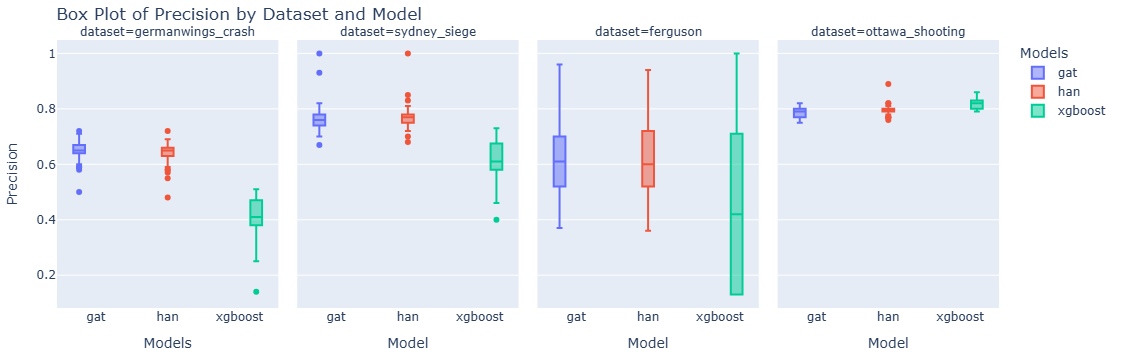

In [83]:
import plotly.express as px

# Filter the dataframe for only the recall metric
df_recall = df_all_tl[df_all_tl['metrics.test_precision'].notnull()]

# Create a Plotly figure for each dataset
fig = px.box(
    df_recall,
    x='model',
    y='metrics.test_precision',
    color='model',
    facet_col='dataset',
    boxmode='group',
    title="Box Plot of Precision by Dataset and Model",
    labels={'metrics.test_precision': 'Precision', 'model': 'Model'}
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Models",
    yaxis_title="Precision",
    legend_title="Models",
    margin=dict(l=40, r=40, t=40, b=40)
)

# Show the plot
fig.show()
